**MergeSort**: $O(n\log(n))$

Text(0.5, 1.0, 'sequential implementation')

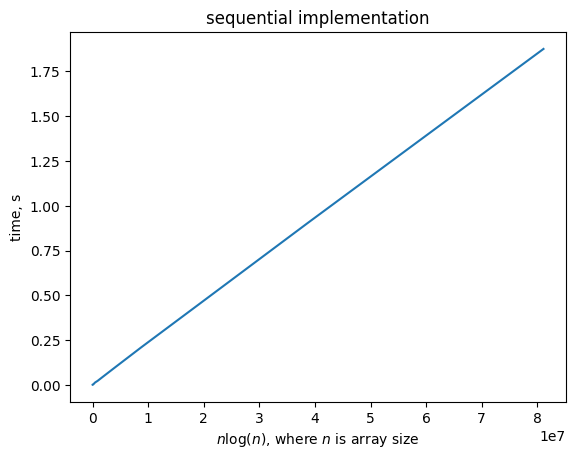

In [1]:
import matplotlib.pyplot as plt
from math import log

ns = [10 * (2**x) for x in range(20)]
ts = [1.8895e-05, 4.837e-06, 6.924e-06, 1.3636e-05, 2.7358e-05, 6.2806e-05, 0.000122387, 
      0.000295459, 0.000568753, 0.00118461, 0.0024992, 0.00531947, 0.0131369, 0.0231193, 
      0.0482826, 0.100809, 0.210444, 0.434689, 0.904978, 1.87605]

plt.plot([n*log(n) for n in ns], ts)
plt.xlabel(r"$n\log(n)$, where $n$ is array size")
plt.ylabel("time, s")
plt.title("sequential implementation")

Время работы последовательной реализации $T_1(n) = \alpha n\log(n)$

Время работы параллельной реализации $T_p(n) = \alpha \frac{n}{p}\log(\frac{n}{p}) + \beta n$

Тогда ускорение $S_p(n) = \frac{T_1(n)}{T_p(n)} = \frac{p\log(n)}{\log(\frac{n}{p}) + \gamma p}$

И эффективность $E_p(n) = \frac{S_p(n)}{p} = \frac{\log(n)}{\log(n) + (\gamma p - \log(p))}$

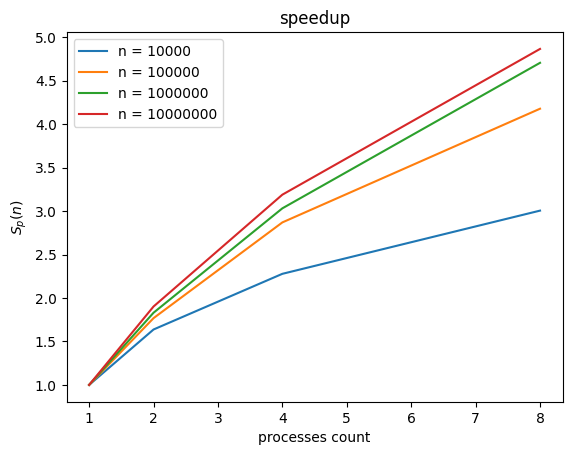

In [2]:
ps = [1, 2, 4, 8]

t10000s = [0.00257633, 0.00157332, 0.00113106, 0.000857449]
t100000s = [0.0297305, 0.0168159, 0.0103622, 0.00711814]
t1000000s = [0.34143, 0.186543, 0.112643, 0.0725748]
t10000000s = [3.99548, 2.10092, 1.25321, 0.821374]

def show_plot(n : int, ts : list[float]):
    Ss = [ts[0] / t for t in ts]
    plt.plot(ps, Ss, label=f"n = {n}")
    plt.xlabel("processes count")
    plt.ylabel("$S_p(n)$")

plt.title(f"speedup")
show_plot(10000, t10000s)
show_plot(100000, t100000s)
show_plot(1000000, t1000000s)
show_plot(10000000, t10000000s)
plt.legend()

**RadixSort**: $O(d \cdot n)$, где $d$ - количество разрядов(в данном случае 16-ричных)

Таким образом имеет смысл переходить на **RadixSort** в любом из процессов при условии $d < \alpha \log(n)$, но для uint64_t, $max\{d\} = 16$. Это условие начинает выполнятся достаточно быстро, и вычисление разрядности лишь мешает в случае малого размера масива. Поэтому условие было заменено на $n > n_0$.

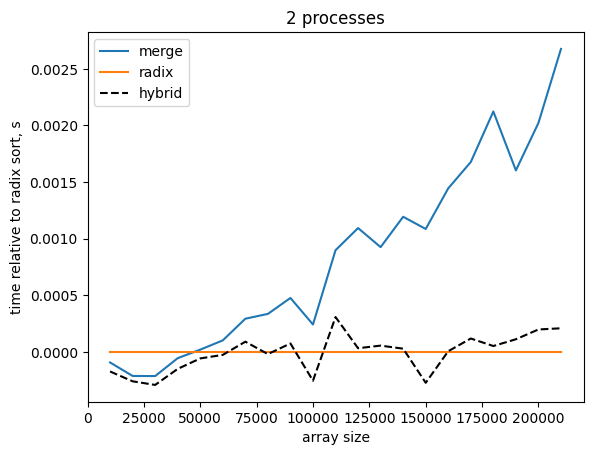

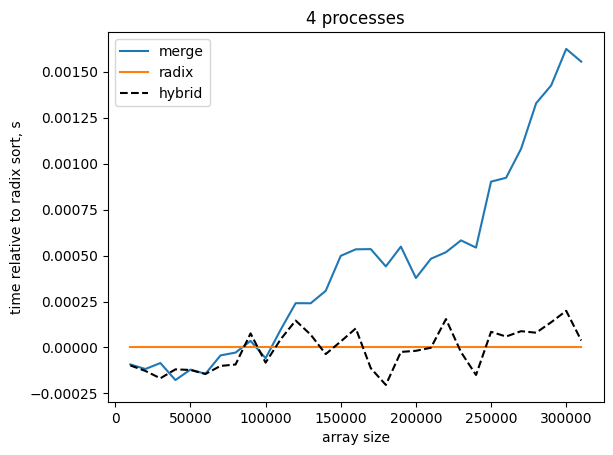

In [23]:
ns = [1e4 * x for x in range(1, 22)]
merge_sort_ts = [0.00165698, 0.0029403, 0.00445914, 0.00620261, 0.00765442, 0.00941286, 0.0109531, 
                 0.0127437, 0.0141607, 0.0159839, 0.0175718, 0.0196211, 0.0205832, 0.0227972, 0.024054, 
                 0.0261348, 0.0273398, 0.0299072, 0.0305805, 0.0328962, 0.0344434]
radix_sort_ts = [0.00174911, 0.00315161, 0.00467143, 0.0062569, 0.00763338, 0.00931001, 0.010659, 0.0124071, 
                 0.0136835, 0.0157408, 0.0166729, 0.0185267, 0.0196572, 0.0216033, 0.0229677, 0.0246898, 
                 0.0256621, 0.0277838, 0.0289771, 0.0308739, 0.0317677]
hybrid_sort_ts = [0.00157737, 0.00289312, 0.00438101, 0.00610801, 0.00757694, 0.00928486, 0.0107503, 
                  0.0123889, 0.013759, 0.0154879, 0.0169815, 0.0185603, 0.0197137, 0.0216329, 0.0226961, 
                  0.0246971, 0.0257814, 0.0278368, 0.0290898, 0.031073, 0.0319773]

def show_plots(processes : int):
    r_merge_sort_ts = [x - y for x,y in  zip(merge_sort_ts, radix_sort_ts)]
    r_hybrid_sort_ts = [x - y for x,y in  zip(hybrid_sort_ts, radix_sort_ts)]
    r_radix_sort_ts = [x - y for x,y in  zip(radix_sort_ts, radix_sort_ts)]

    plt.plot(ns, r_merge_sort_ts, label="merge")
    plt.plot(ns, r_radix_sort_ts, label="radix")
    plt.plot(ns, r_hybrid_sort_ts, "--", label="hybrid", color="black")
    plt.xlabel("array size")
    plt.ylabel("time relative to radix sort, s")
    plt.legend()
    plt.title(f"{processes} processes")
    plt.show()

show_plots(2)

ns = [1e4 * x for x in range(1, 32)]
merge_sort_ts = [0.000912298, 0.00173249, 0.00263827, 0.00347426, 0.00436963, 0.00529589, 0.00626468, 0.00716935, 0.00806167, 0.00898858, 0.00994089, 0.0109182, 0.0117716, 0.0128307, 0.0138122, 0.0147591, 0.0157191, 0.0165947, 0.017498, 0.0182057, 0.0192295, 0.0201484, 0.0210902, 0.0220768, 0.0231259, 0.0240333, 0.025102, 0.0261555, 0.0271133, 0.0282387, 0.0290395]
radix_sort_ts = [0.00100439, 0.00184952, 0.00272285, 0.00365129, 0.00448986, 0.00543912, 0.00630768, 0.00719708, 0.00802572, 0.00904699, 0.00984454, 0.0106773, 0.0115311, 0.0125228, 0.0133139, 0.0142254, 0.0151843, 0.0161539, 0.0169496, 0.017828, 0.0187471, 0.0196304, 0.0205079, 0.0215338, 0.0222242, 0.0231107, 0.0240213, 0.0248276, 0.0256885, 0.0266155, 0.0274854]
hybrid_sort_ts = [0.000906829, 0.00172214, 0.00255539, 0.00353236, 0.0043677, 0.00529509, 0.00620753, 0.00710449, 0.00810234, 0.00896459, 0.00988885, 0.0108237, 0.0116007, 0.0124869, 0.0133465, 0.0143293, 0.0150714, 0.0159504, 0.0169255, 0.0178099, 0.0187457, 0.0197849, 0.0204829, 0.0213843, 0.0223094, 0.0231703, 0.02411, 0.0249079, 0.0258257, 0.026815, 0.0275234]

show_plots(4)